checking if external imports are ok 

In [1]:
from superpixel_graphs.transforms.ext import greyscale_features, color_features

## .transforms

In [1]:
import torch
import torchvision 
import torchvision.datasets as datasets
import torchvision.transforms as T
import numpy as np
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader

import matplotlib.pyplot as plt
import skimage as ski
from skimage.segmentation import slic

import networkx as nx
from torch_geometric.utils import to_networkx

In [2]:
import superpixel_graphs.transforms.functional as F
import superpixel_graphs.transforms as transforms

from superpixel_graphs.transforms.functional import to_superpixel_graph_greyscale,to_superpixel_graph_color, to_segments_greyscale, to_segments_color

#### Greyscale images

In [4]:
ds = datasets.MNIST(root='mnist/test', train=False, download=True)

<class 'PIL.Image.Image'>


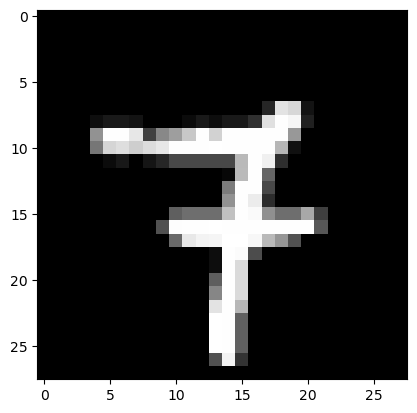

In [6]:
img, y = ds[75]
print(type(img))
plt.imshow(img, cmap='gray')
# plt.imshow(img[0,:,:], cmap='gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.996078431372549 0.0


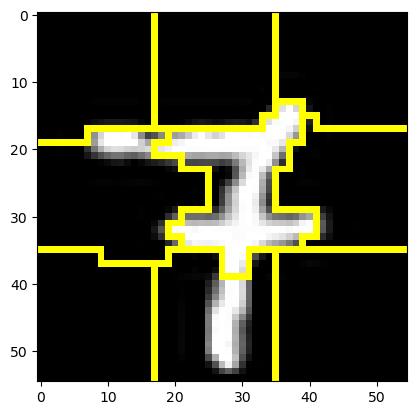

In [18]:
n_segments = 10
seg_method = transforms.SegmentationMethod.SLIC0
graph_type = transforms.GraphType.FEATURE_1NN

_,segments = to_segments_greyscale(img, 
                                 n_segments=n_segments, 
                                 segmentation_method=seg_method)

img_np = np.asarray(img)/255
print(img_np.max(), img_np.min())
plt.imshow(ski.segmentation.mark_boundaries(img_np, segments, mode='subpixel'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.99607843 0.0


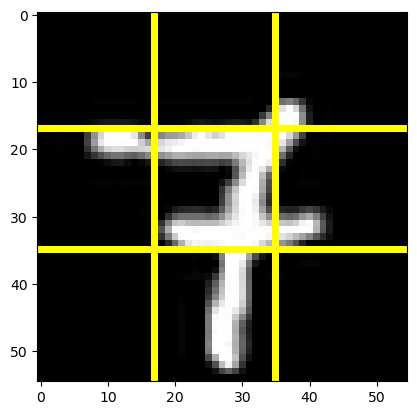

In [17]:
img_np = np.asarray(img, dtype=np.float32)/255.0
print(img_np.max(), img_np.min())
segments = slic(img_np, n_segments=n_segments, slic_zero=True, channel_axis=None)
plt.imshow(ski.segmentation.mark_boundaries(img_np, segments, mode='subpixel'))

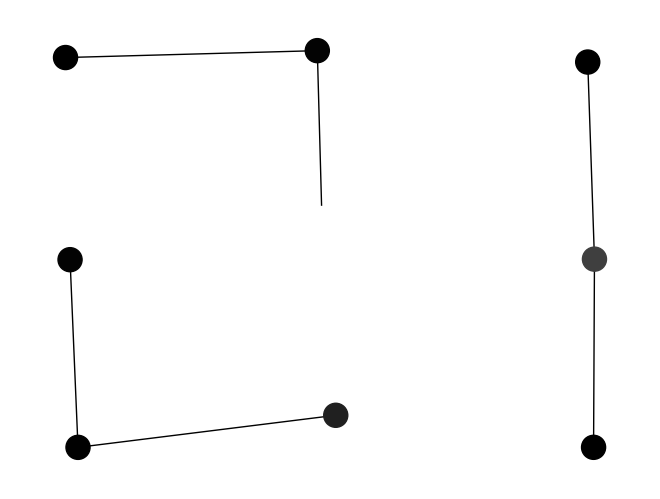

In [12]:
graph = to_superpixel_graph_greyscale(img, 
                                      n_segments=n_segments,
                                      segmentation_method=seg_method,
                                      graph_type=graph_type)
pos = graph.pos.numpy()
features = graph.x.numpy()

nx_g = to_networkx(graph, to_undirected=True)
nx_color = features[:,transforms.FeatureGreyscale.AVG_COLOR.value]
nx_pos = dict(zip(range(graph.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')

#### Color images

In [ ]:
ds = datasets.STL10(root='stl10/test', split='test', download=True)

In [3]:
ds = datasets.CIFAR10(root='cifar10/test', train=False, download=True)

Files already downloaded and verified


<class 'PIL.Image.Image'>


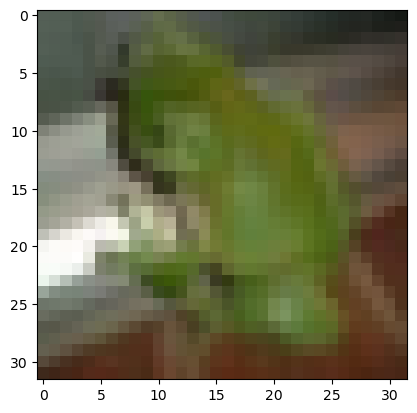

In [4]:
img, y = ds[7]
print(type(img))
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


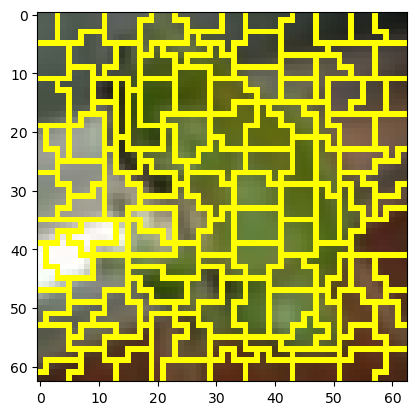

In [5]:
from superpixel_graphs.transforms import FeatureColor
n_segments = 100
seg_method = transforms.SegmentationMethod.SLIC
compactness = 100
graph_type = transforms.GraphType.RAG
feature_list = [FeatureColor.AVG_COLOR,
                FeatureColor.CENTROID,
                FeatureColor.NUM_PIXELS]

_,segments = to_segments_color(img, 
                             n_segments=n_segments, 
                             segmentation_method=seg_method, 
                             compactness=compactness)

img_np = np.asarray(img)
plt.imshow(ski.segmentation.mark_boundaries(img_np, segments, mode='subpixel'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


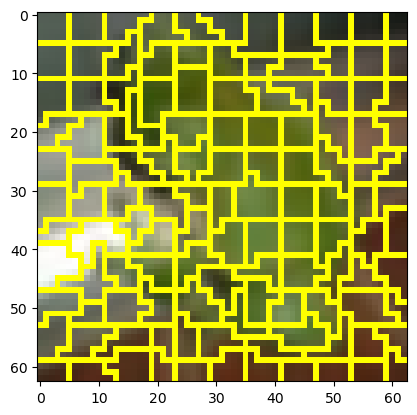

In [11]:
img_np = np.asarray(img)
segments = slic(img_np, n_segments=n_segments, slic_zero=True)
plt.imshow(ski.segmentation.mark_boundaries(img_np, segments, mode='subpixel'))

(119, 6)


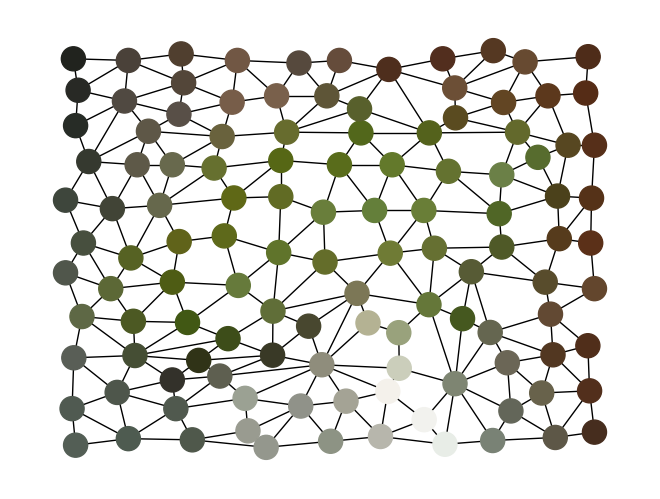

In [6]:
graph = to_superpixel_graph_color(img, 
                                  n_segments=n_segments,
                                  segmentation_method=seg_method,
                                  graph_type=graph_type,
                                  compactness=compactness,
                                  features=feature_list)
pos = graph.pos.numpy()
features = graph.x.numpy()
print(features.shape)

nx_g = to_networkx(graph, to_undirected=True)
nx_color = features[:,transforms.FeatureColor.AVG_COLOR.value]*255
nx_pos = dict(zip(range(graph.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

#### As composable transforms

In [3]:
ds = datasets.MNIST(root='mnist/test', train=False, download=True, transform=transforms.ToSuperpixelGraphGreyscale())

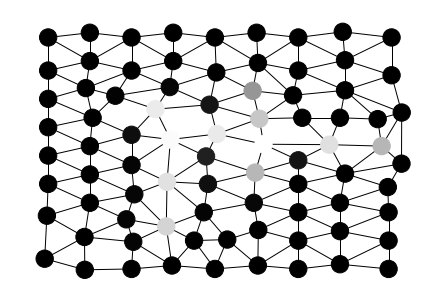

In [4]:
graph, y = ds[75]

pos = graph.pos.numpy()
features = graph.x.numpy()

nx_g = to_networkx(graph, to_undirected=True)
nx_color = features[:,transforms.FeatureGreyscale.AVG_COLOR.value]
nx_pos = dict(zip(range(graph.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')

In [5]:
ds = datasets.CIFAR10(root='cifar10/test', train=False, download=True, transform=transforms.ToSuperpixelGraphColor())

Files already downloaded and verified


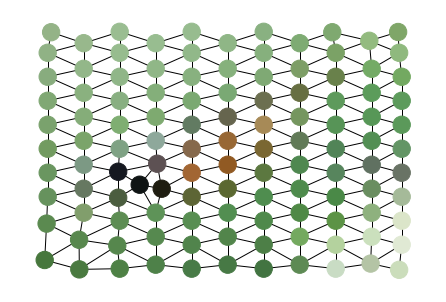

In [6]:
graph, y = ds[75]

pos = graph.pos.numpy()
features = graph.x.numpy()

nx_g = to_networkx(graph, to_undirected=True)
nx_color = features[:,transforms.FeatureColor.AVG_COLOR.value]
nx_pos = dict(zip(range(graph.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)

## .datasets

Greyscale

In [5]:
from superpixel_graphs.datasets import SuperPixelGraphMNIST

In [7]:
test_ds  = SuperPixelGraphMNIST(root=None, 
                                n_segments=75,
                                compactness=0.1,
                                features=None,
                                graph_type='16NNSpatial',
                                slic_method='SLIC0',
                                train=False,
                                pre_select_features=False)

Selected features for 16NNSpatial graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid
MNIST Loaded.
Average number of nodes: 65.5877 with standard deviation 4.065305487906167
Average number of edges: 188.8811 with standard deviation 19.18797443165901


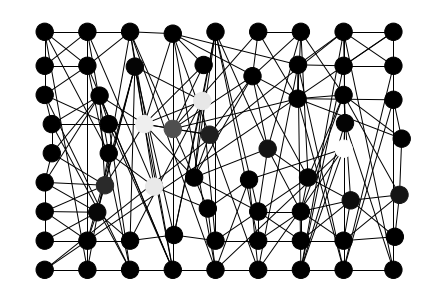

In [10]:
import networkx as nx
from torch_geometric.utils import to_networkx

index = 0
g = test_ds[index]
pos = g.pos.numpy()
features = g.x.numpy()

nx_g = to_networkx(g, to_undirected=True)
nx_color = features[:,0]
nx_pos = dict(zip(range(g.num_nodes), pos))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color, cmap='gray')

Color

In [12]:
from superpixel_graphs.datasets import SuperPixelGraphCIFAR10

In [13]:
n_segments = 75
compactness = 0.1
graph_type = 'RAG'
slic_method = 'SLIC0'
features = ['avg_color',
            'std_deviation_color',
            'centroid',
            'std_deviation_centroid']
test_ds  = SuperPixelGraphCIFAR10(root=None, 
                                  n_segments=n_segments,
                                  compactness=compactness,
                                  features=features,
                                  graph_type=graph_type,
                                  slic_method=slic_method,
                                  train=False,
                                  pre_select_features=False)

Selected features for RAG graph:
	+ avg_color
	+ std_deviation_color
	+ centroid
	+ std_deviation_centroid


Processing...


  0%|          | 0/170498071 [00:00<?, ?it/s]

KeyboardInterrupt: 

Files already downloaded and verified
0.779085 0.0


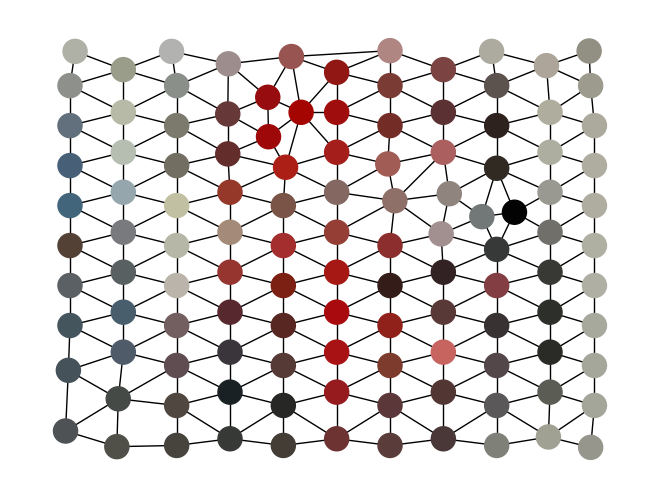

In [8]:
import networkx as nx
from torch_geometric.utils import to_networkx


idx = 23
img = test_ds.get_og_img(idx)
g = test_ds[idx]

nx_g = to_networkx(g, to_undirected=True)
nx_color = g.x[:,0:3].numpy()
print(np.max(nx_color), np.min(nx_color))
nx_pos = dict(zip(range(g.num_nodes), g.pos.numpy()))
nx.draw(nx_g, pos=nx_pos, node_color=nx_color)